In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [27]:
bnb_df = pd.read_csv("bnb_model_comparison.csv")
from_scratch_df = pd.read_csv("from_scratch_model_comparison.csv")

df = pd.concat([bnb_df, from_scratch_df])

# df = pd.read_csv("bnb_model_comparison.csv")

df = df.groupby("Model").mean().reset_index()

df = df.sort_values(by="Memory (GB)", ascending=False)


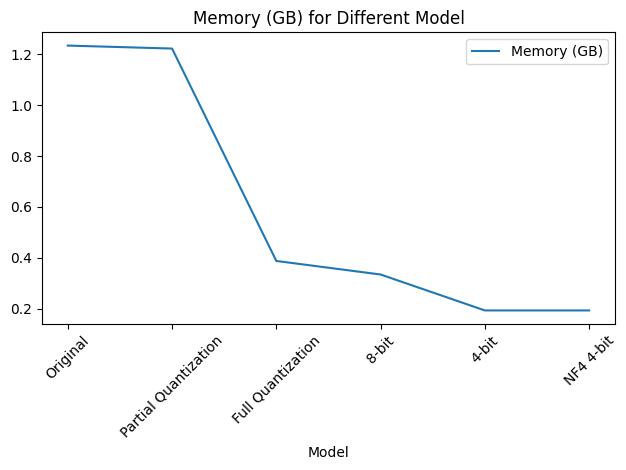

In [28]:
fig, ax = plt.subplots()
df.plot(x="Model", y="Memory (GB)", kind="line", ax=ax)

plt.xticks(rotation=45)
plt.title("Memory (GB) for Different Model")
plt.tight_layout()
plt.savefig("bnb_memory.png")
plt.show()

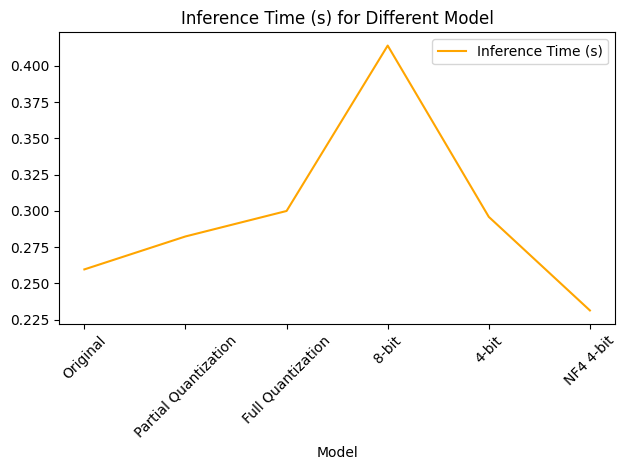

In [29]:
fig, ax = plt.subplots()
df.plot(x="Model", y="Inference Time (s)", kind="line", ax=ax, color="orange")

plt.xticks(rotation=45)
plt.title("Inference Time (s) for Different Model")
plt.tight_layout()
plt.savefig("bnb_inference_time.png")
plt.show()

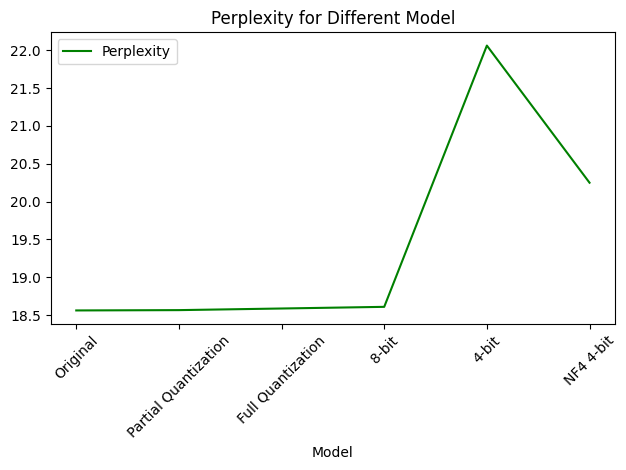

In [30]:
fig, ax = plt.subplots()
df.plot(x="Model", y="Perplexity", kind="line", ax=ax, color="green")

plt.xticks(rotation=45)
plt.title("Perplexity for Different Model")
plt.tight_layout()
plt.savefig("bnb_perplexity.png")
plt.show()

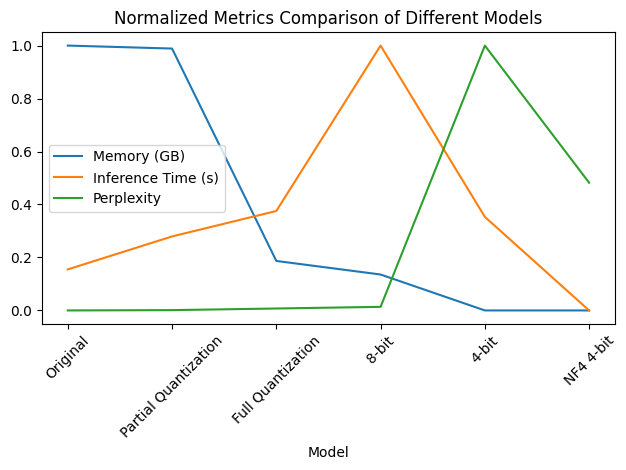

In [31]:
scaler = MinMaxScaler()

df[["Memory (GB)", "Inference Time (s)", "Perplexity"]] = scaler.fit_transform(
    df[["Memory (GB)", "Inference Time (s)", "Perplexity"]]
)

fig, ax = plt.subplots()
df.plot(x="Model", y="Memory (GB)", kind="line", ax=ax)
df.plot(x="Model", y="Inference Time (s)", kind="line", ax=ax)
df.plot(x="Model", y="Perplexity", kind="line", ax=ax)

plt.title("Normalized Metrics Comparison of Different Models")

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("bnb_normalized_metrics.png")
plt.show()